In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.metrics import confusion_matrix, classification_report

In [126]:
file_path = 'WA_Fn-UseC_-HR-Employee-Attrition.csv'
df = pd.read_csv(file_path, sep=',')

In [106]:
pd.set_option("display.max_columns", None) 
display(df)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

В датасете 1470 записей. 35 столбцов, из которых 26 числовые, а 9 категориальные.

In [108]:
"Пропущенные значения в колонках", df.isnull().sum()

('Пропущенные значения в колонках',
 Age                         0
 Attrition                   0
 BusinessTravel              0
 DailyRate                   0
 Department                  0
 DistanceFromHome            0
 Education                   0
 EducationField              0
 EmployeeCount               0
 EmployeeNumber              0
 EnvironmentSatisfaction     0
 Gender                      0
 HourlyRate                  0
 JobInvolvement              0
 JobLevel                    0
 JobRole                     0
 JobSatisfaction             0
 MaritalStatus               0
 MonthlyIncome               0
 MonthlyRate                 0
 NumCompaniesWorked          0
 Over18                      0
 OverTime                    0
 PercentSalaryHike           0
 PerformanceRating           0
 RelationshipSatisfaction    0
 StandardHours               0
 StockOptionLevel            0
 TotalWorkingYears           0
 TrainingTimesLastYear       0
 WorkLifeBalance             0
 Ye

Пропущенных значений нет

In [ ]:
df.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,NaN,882,NaN,NaN,NaN,326,NaN,673,NaN,NaN,NaN,1470,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,2.721769,NaN,65.891156,2.729932,2.063946,NaN,2.728571,NaN,6502.931293,14313.103401,2.693197,NaN,NaN,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,1.093082,NaN,20.329428,0.711561,1.106940,NaN,1.102846,NaN,4707.956783,7117.786044,2.498009,NaN,NaN,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,2094.000000,0.000000,NaN,NaN,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,2.000000,NaN,48.000000,2.000000,1.000000,NaN,2.000000,NaN,2911.000000,8047.000000,1.000000,NaN,NaN,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,4919.000000,14235.500000,2.000000,NaN,NaN,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,4.000000,NaN,83.750000,3.000000,3.000000,NaN,4.000000,NaN,8379.000000,20461.500000,4.000000,NaN,NaN,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


Столбец EmployeeNumber - id |
Столбец EmployeeCount - всегда 1 |
Столбец Over18 - всегда Y |
Столбец StandardHours - всегда 80 |


In [127]:
drop_cols = ['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours']
df = df.drop(columns=drop_cols)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [175]:
df_encoded = df.copy()
for colname in df_encoded.select_dtypes("object"):
    df_encoded[colname], _ = df_encoded[colname].factorize()

Label encoding для EDA

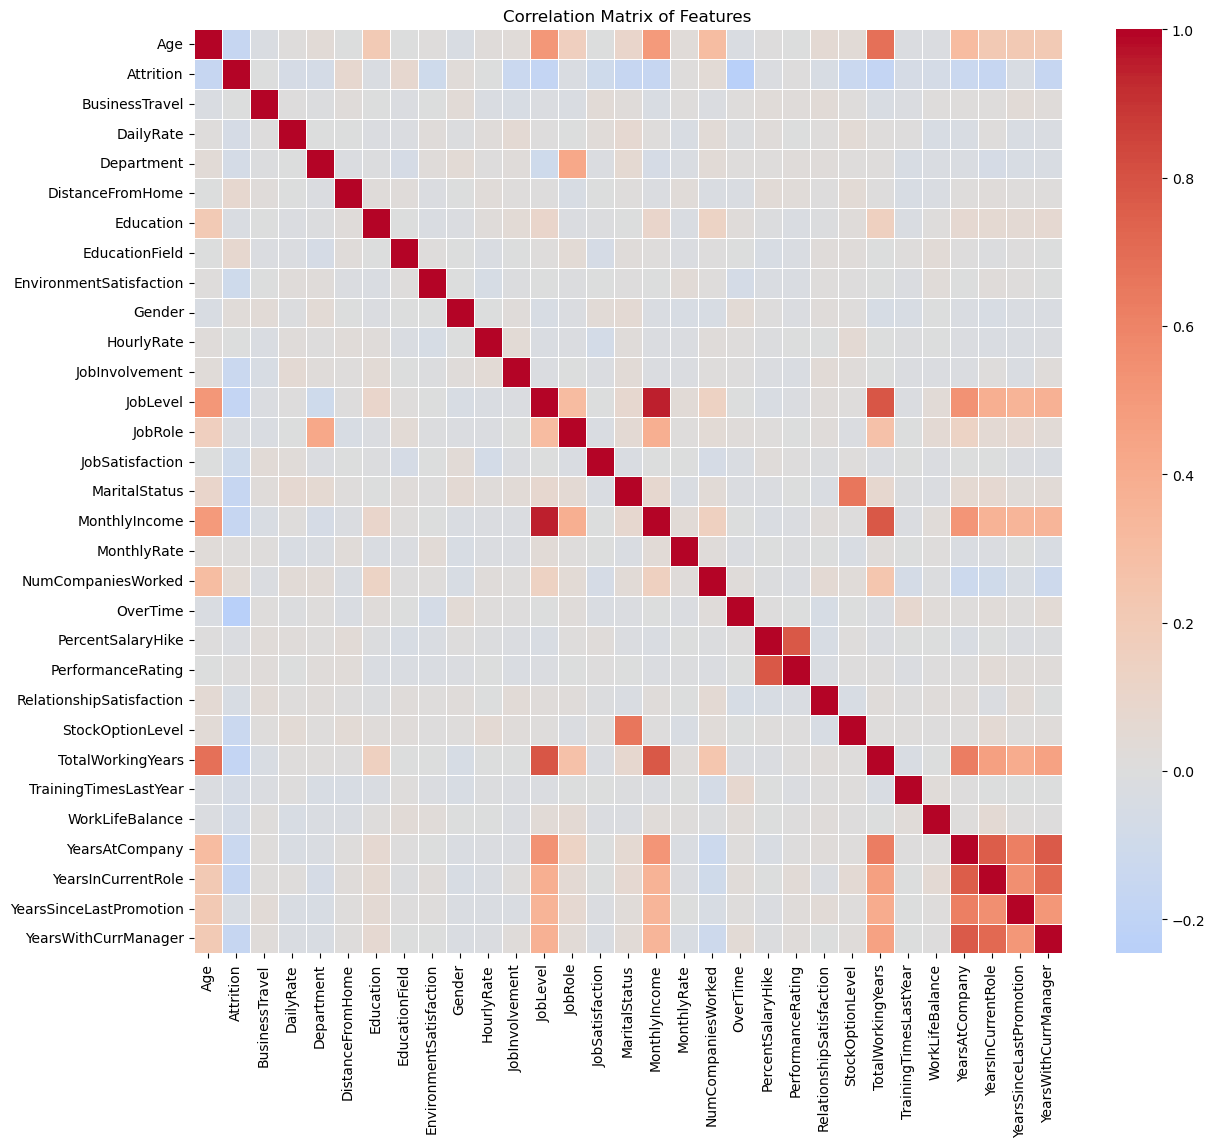

Признаки, имеющие наибольшую корреляцию с Attrition:
 Attrition               1.000000
OverTime                0.246118
TotalWorkingYears       0.171063
JobLevel                0.169105
MaritalStatus           0.162070
YearsInCurrentRole      0.160545
MonthlyIncome           0.159840
Age                     0.159205
YearsWithCurrManager    0.156199
StockOptionLevel        0.137145
Name: Attrition, dtype: float64


In [ ]:
corr = df_encoded.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(corr, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

top_features = corr['Attrition'].abs().sort_values(ascending=False)[:10]
print("Признаки, имеющие наибольшую корреляцию с Attrition:\n", top_features)

Attrition не имеет высоких корреляций, но можно рассмотреть влиянее наиболее коррелирующих

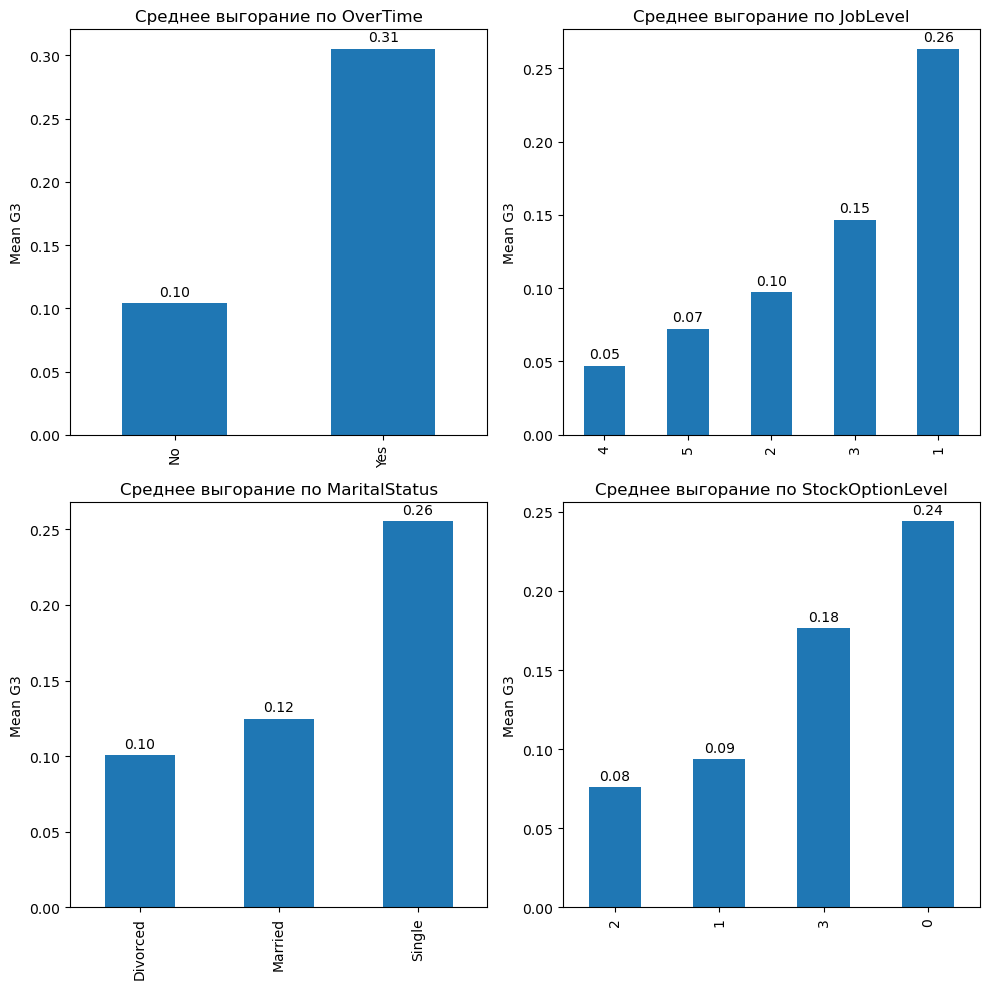

In [161]:
feature_names = top_features.index.tolist()
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()
for ax, col in zip(axes, ['OverTime', 'JobLevel', 'MaritalStatus', 'StockOptionLevel']):
    vals = df.groupby(col)['Attrition'].mean().sort_values()
    bars = vals.plot(kind='bar', ax=ax)
    for bar in bars.patches:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x()+bar.get_width()/2, height),
                    xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')
    ax.set_title(f'Среднее выгорание по {col}')
    ax.set_xlabel('')
    ax.set_ylabel('Mean G3')
plt.tight_layout()
plt.show()

Переработки, низкий статус работы, одиночество и отсутствие доли в компании ведут к выгоранию

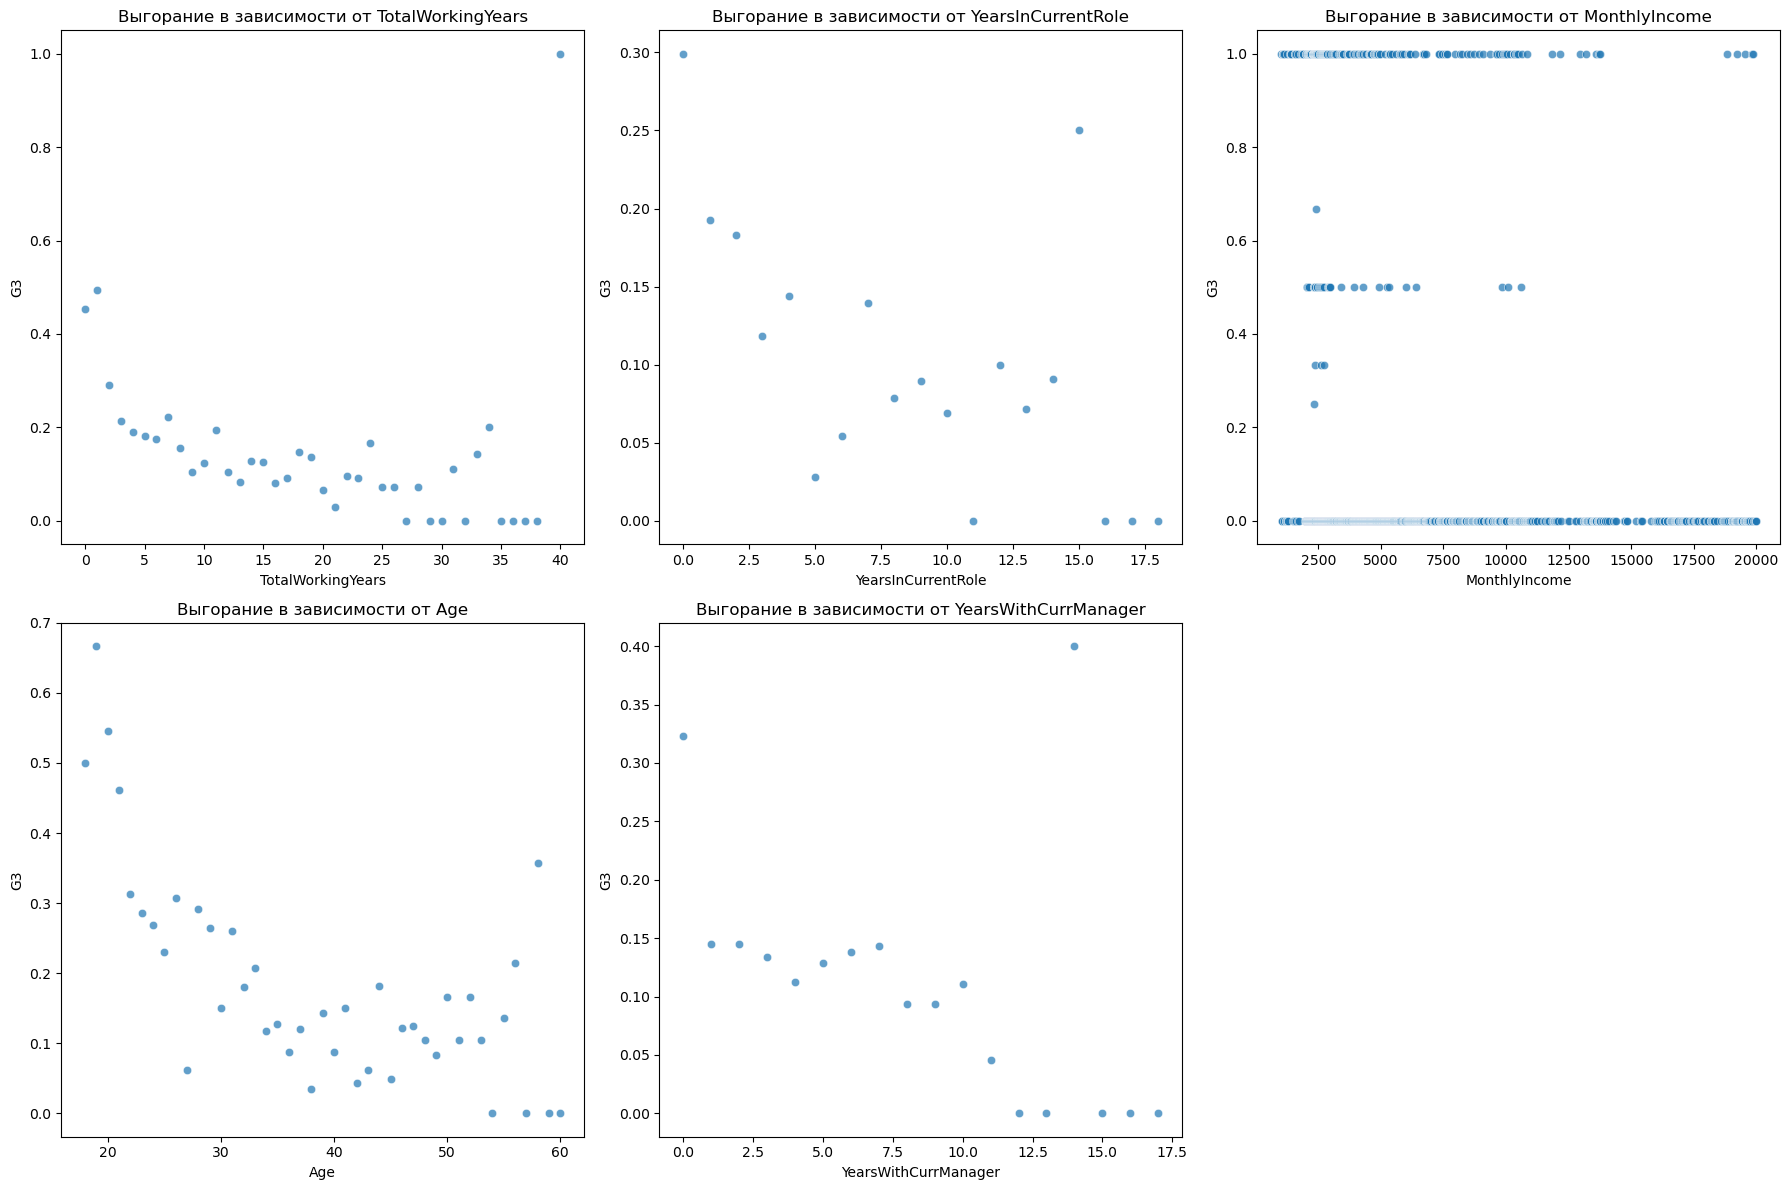

In [174]:
plt.figure(figsize=(18, 12))
for i, feature in enumerate(df[['TotalWorkingYears', 'YearsInCurrentRole', 'MonthlyIncome','Age', 'YearsWithCurrManager']], 1):
    plt.subplot(2, 3, i)
    vals = df.groupby(feature)['Attrition'].mean().reset_index()  
    sns.scatterplot(data=vals, x=feature, y='Attrition', alpha=0.7)
    plt.xlabel(feature)
    plt.ylabel('G3')
    plt.title(f'Выгорание в зависимости от {feature}')
    plt.tight_layout()
plt.show()

Сильнее всего выгорание затрагивает новичков по опыту, по должности или в общении с новым менеджером, а также сотрудников с низким доходом и молодёжью.

 Оптимальный «золотой» возраст и стаж — около 5–10 лет, когда удержание максимальное.

In [128]:
categorical = df.select_dtypes(include='object')
numerical = df.select_dtypes(include='int64')

In [151]:
le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])

In [ ]:
df = pd.get_dummies(df, columns=categorical.columns.drop(["Attrition"]), drop_first=True)

In [ ]:
scaler = StandardScaler()
df[numerical.columns.tolist()] = scaler.fit_transform(df[numerical.columns.tolist()])


Выше было проведено приведение признаков для использования моделей.

 Целевая переменная была закодирована в 0 и 1, категориальные переменные были One-Hot закодированы,а числовые были нормализованы

In [ ]:
df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.446350,1,0.742527,-1.010909,-0.891688,-0.660531,1.383138,0.379672,-0.057788,1.153254,-0.108350,0.726020,2.125136,-1.150554,-0.426230,-1.584178,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True
1,1.322365,0,-1.297775,-0.147150,-1.868426,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,-0.291719,1.488876,-0.678049,2.129306,2.346151,1.191438,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541,True,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False
2,0.008343,1,1.414363,-0.887515,-0.891688,1.169781,1.284725,-1.026167,-0.961486,0.246200,-0.937654,-1.674841,1.324226,-0.057267,-0.426230,-0.658973,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935,False,True,True,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,True,True
3,-0.429664,0,1.461466,-0.764121,1.061787,1.169781,-0.486709,0.379672,-0.961486,0.246200,-0.763634,1.243211,-0.678049,-1.150554,-0.426230,0.266233,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True
4,-1.086676,0,-0.524295,-0.887515,-1.868426,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,-0.644858,0.325900,2.525591,-0.877232,-0.426230,1.191438,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227,False,True,True,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,0,0.202082,1.703764,-0.891688,0.254625,-1.224807,1.785511,-0.057788,1.153254,-0.835451,-0.284329,0.523316,0.489376,-0.426230,0.266233,0.241988,0.735447,0.155707,0.338096,-0.327893,-0.615492,-0.679146,-0.314873,True,False,True,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,True,False,False
1466,0.227347,0,-0.469754,-0.393938,-1.868426,1.169781,-1.175601,-1.026167,0.845911,-1.567907,0.741140,1.004010,0.523316,-0.057267,-0.426230,-1.584178,0.241988,-0.293077,1.707500,0.338096,-0.001333,0.764998,-0.368715,0.806541,False,True,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False
1467,-1.086676,0,-1.605183,-0.640727,0.085049,-0.660531,1.038693,1.785511,-0.057788,-0.660853,-0.076690,-1.284418,-0.678049,1.309341,2.346151,-0.658973,0.241988,-0.678774,-2.171982,0.338096,-0.164613,-0.615492,-0.679146,-0.314873,False,True,True,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,True
1468,1.322365,0,0.546677,-0.887515,0.085049,1.169781,-0.142264,-1.026167,-0.057788,-0.660853,-0.236474,-0.150393,-0.277594,-0.330589,-0.426230,1.19143

In [ ]:
X = df.drop(columns=["Attrition"])
y = df['Attrition']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

Разделение на тестовую и обучающую выборки

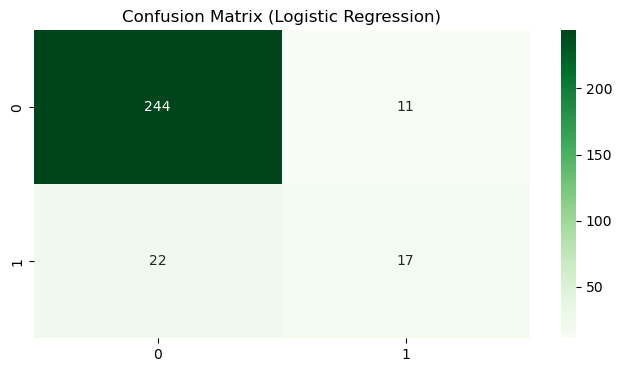

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       255
           1       0.61      0.44      0.51        39

    accuracy                           0.89       294
   macro avg       0.76      0.70      0.72       294
weighted avg       0.88      0.89      0.88       294

MAE 0.11224489795918367
MSE 0.11224489795918367


In [182]:
log_model = LogisticRegression(max_iter=500,solver="lbfgs",fit_intercept=True)
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)

confusionMatrix = confusion_matrix(y_test, y_pred)
classReport = classification_report(y_test, y_pred)

plt.figure(figsize=(8,4))
sns.heatmap(confusionMatrix,annot=True,fmt="d",cmap="Greens")
plt.title("Confusion Matrix (Logistic Regression)")
plt.show()

print(classReport)

print(f'MAE', mean_absolute_error(y_test, y_pred))
print(f'MSE', mean_squared_error(y_test, y_pred))

Для логистической регресси был выбран метод lbfgs по результатам перебора.

Максимальное количество итераций было выбрано путем добавления 100 итераций до момента отсутствия ошибки.

Логистическая регрессия хорошо отделяет тех, кто остаётся («0»), но недостаточно чётко выявляет выгорание («1»), что видно по невысокому recall для класса 1.

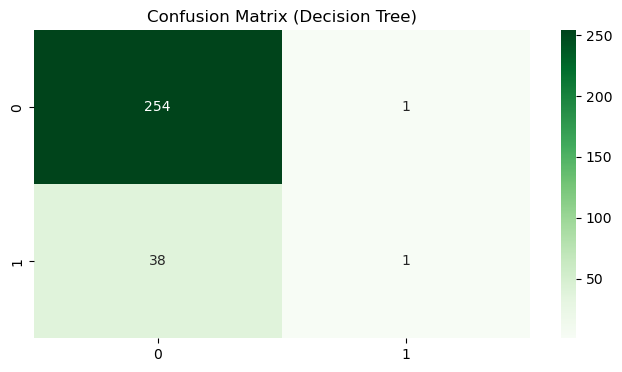

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       0.50      0.03      0.05        39

    accuracy                           0.87       294
   macro avg       0.68      0.51      0.49       294
weighted avg       0.82      0.87      0.81       294

MAE 0.1326530612244898
MSE 0.1326530612244898


In [ ]:
decT_model = DecisionTreeClassifier(max_depth=3,min_samples_split=10) # Performansı arttırmak için
decT_model.fit(X_train, y_train)

y_pred = decT_model.predict(X_test)

confusionMatrix = confusion_matrix(y_test, y_pred)
classReport = classification_report(y_test, y_pred)

plt.figure(figsize=(8,4))
sns.heatmap(confusionMatrix,annot=True,fmt="d",cmap="Greens")
plt.title("Confusion Matrix (Decision Tree)")
plt.show()

print(classReport)

print(f'MAE', mean_absolute_error(y_test, y_pred))
print(f'MSE', mean_squared_error(y_test, y_pred))


Глубина дерева - 3 выбрана перебором, при меньшем или больше увеличиваются ошибки.

Дерево решений почти никогда не ошибается в пользу «0» (невыгорание), но при этом почти не находит выгорающих (recall только 3%), поэтому F1-score для класса 1 критически низок.

 Это указывает на сильный перекос в предсказаниях в пользу отрицательного класса.

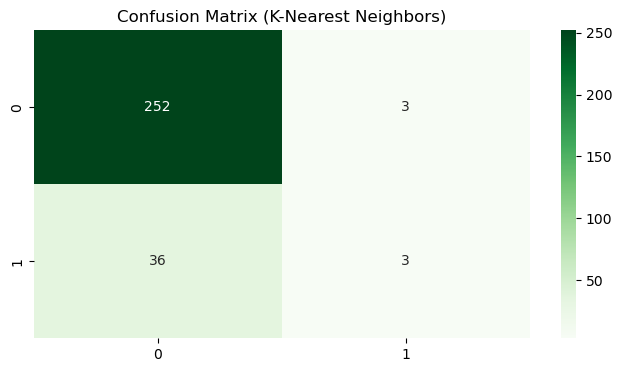

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.50      0.08      0.13        39

    accuracy                           0.87       294
   macro avg       0.69      0.53      0.53       294
weighted avg       0.83      0.87      0.82       294

MAE 0.1326530612244898
MSE 0.1326530612244898


In [ ]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

confusionMatrix = confusion_matrix(y_test, y_pred)
classReport = classification_report(y_test, y_pred, zero_division=True)

plt.figure(figsize=(8,4))
sns.heatmap(confusionMatrix, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix (K-Nearest Neighbors)")
plt.show()

print(classReport)

print(f'MAE', mean_absolute_error(y_test, y_pred))
print(f'MSE', mean_squared_error(y_test, y_pred))


KNN, как и дерево, «консервативен» — почти всегда предсказывает класс 0. 

В результате высокая точность по «0», но очень низкий recall по «1». 

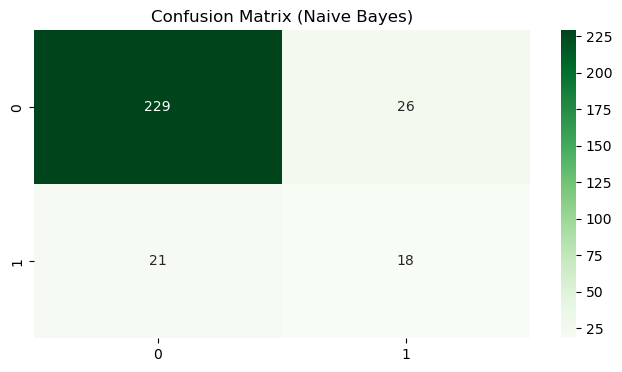

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       255
           1       0.41      0.46      0.43        39

    accuracy                           0.84       294
   macro avg       0.66      0.68      0.67       294
weighted avg       0.85      0.84      0.84       294

MAE 0.1598639455782313
MSE 0.1598639455782313


In [ ]:
nb_model = BernoulliNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

confusionMatrix = confusion_matrix(y_test, y_pred)
classReport = classification_report(y_test, y_pred, zero_division=True)

plt.figure(figsize=(8,4))
sns.heatmap(confusionMatrix, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix (Naive Bayes)")
plt.show()

print(classReport)

print(f'MAE', mean_absolute_error(y_test, y_pred))
print(f'MSE', mean_squared_error(y_test, y_pred))


Наивный байес лучше улавливает выгорающих но при этом больше «перепрыгивает» в «1». 

Это даёт более высокий баланс  за счёт некоторого роста ошибок второго рода.

Лучшая модель на текущем этапе: Логистическая регрессия

1. Общая точность

Логистическая регрессия показывает наивысший показатель accuracy (≈ 0.89), тогда как у Наивного БАйеса – 0.84, у KNN – 0.87, у дерева – 0.87.

2. Сбалансированность метрик для класса «выгорание» (1)

Precision₁ = 0.61 и Recall₁ = 0.44 (F1₁ = 0.51).

Ни одна из других моделей не достигает такого сочетания precision и recall для класса «1»:

Наивный Байес: precision₁ = 0.41, recall₁ = 0.46 (F1₁ = 0.43)

KNN: precision₁ = 0.50, recall₁ = 0.08 (F1₁ = 0.13)

Дерево решений: precision₁ ≤ 0.50, recall₁ ≤ 0.15 (F1₁ ≤ 0.18)

3. Взвешенная F1-оценка

Логистическая регрессия: weighted-F1 ≈ 0.88

У остальных моделей weighted-F1 не превышает 0.84

В сумме этой модели удаётся достичь лучшего баланса между точностью «не выгорающих» и распознаванием «выгорающих», при этом сохраняя высокую общую метрику и понятную интерпретацию итогового решения.







